In [1]:
import sys
import re
sys.path.append('../../')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import grpc
import requests

import types_pb2
import types_pb2_grpc
from google.protobuf import timestamp_pb2

from pymongo import MongoClient
import requests
import pymongo

import json
import csv

#from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import create_engine
import sqlite3
from sqlite3 import Error
import streamlit as st


from collections import defaultdict

%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [2]:
def csv_to_json(csv_file,json_file):
    csvfile=open(csv_file,'r')
    jsonfile=open(json_file,'w')
    df=pd.read_csv(csv_file)
    fieldnames=df.columns
    reader=csv.DictReader(csvfile,fieldnames)
    next(reader)
    jsonfile.write('[')
    for row in reader:
        #jsonfile.write("datas:[")
        try:
            row=list(map(int,row))
        except:
            pass
        json.dump(row,jsonfile)
        jsonfile.write(',\n')
    jsonfile.write(']')
    
def json_load(filename):
    r=filename
    with open(r,'r') as f:
        aug_list=json.loads(f.read())
    return aug_list

In [8]:
aug_btc='Project/augmento_btc.json'
aug_eth='Project/augmento_eth.json'
senti_btc='Project/crypto_app/data/my_data_senti.json'

In [9]:
aug_btc='Project/crypto_app/data/augmento_btc.json'
aug_eth='Project/crypto_app/data/augmento_eth.json'

In [10]:
btc_data=json_load(aug_btc)
eth_data=json_load(aug_eth)
btc_senti=json_load(senti_btc)

In [9]:
#sqlite3 sql
#engine=create_engine('sqlite://',echo=False)
#conn=sqlite3.connect("aug_btc.db")
#c=conn.cursor()
#c.close()

In [10]:
#btc_engine=create_engine("sqlite:///aug_btc.db")
#eth_engine=create_engine("sqlite:///aug_eth.db")
#senti_engine=create_engine("sqlite:///senti_btc.db")
crypto_engine=create_engine('sqlite:///crypto.db')

In [11]:
btc_aug=pd.DataFrame(btc_data)
eth_aug=pd.DataFrame(eth_data)
btc_senti_df=pd.DataFrame(btc_senti)

In [12]:
conn=crypto_engine.connect()

In [11]:
#btc_aug.to_sql('btc_aug',con=crypto_engine)
#eth_aug.to_sql('eth_aug',con=crypto_engine)
#btc_senti_df.to_sql('senti_btc',con=crypto_engine)

In [13]:
sql_command='''
    SELECT * FROM btc_aug
'''
crypto_engine.execute("SELECT * FROM btc_aug").fetchall()

[(0, '2016-11-04 15:00:00', '693.1', '1.0', '0.0', '4.0', '0.0', '0.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '5.0', '13.0', '0.0', '0.0', '0.0', '0.0', '0.0', '3.0', '0.0', '1.0', '6.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '5.0', '0.0', '1.0', '0.0', '3.0', '0.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '7.0', '2.0', '1.0', '0.0', '0.0', '0.0', '0.0', '6.0', '0.0', '2.0', '0.0', '4.0', '0.0', '1.0', '14.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '17.0', '0.0', '0.0', '4.0', '0.0', '5.0', '0.0', '4.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '17.0', '8.0', '1.0', '0.0', '0.0', '0.0', '5.0', '1.0', '2.0', '2.0', '2.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0', '8.0', '8.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '19.0', '0.0', '0.0', '1.0', '3.0', '0.0', '4.0', '0.0', '0.0', '0.0', '3.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0', '4.0', '0.0',

In [23]:
%%capture
%load_ext sql
%sql sqlite:///crypto.db

In [26]:
#%load_ext 
%%sql 
SELECT * FROM btc_aug

SyntaxError: invalid syntax (Temp/ipykernel_36716/2969932755.py, line 3)

In [48]:
sql_command='''
    SELECT *, SUM(*), AVG(*) FROM btc_aug
    '''

In [115]:
#pd.read_sql_query(sql_command,conn)

In [78]:
list_of_features=list(btc_aug.columns)

In [79]:
list_features=['Date','listing_close','twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic','reddit_negative',
              'bitcointalk_positive','reddit_positive','twitter_positive','twitter_prediction','bitcointalk_prediction','reddit_prediction']

In [80]:
new_dict={list_of_features[i]:list_features[i] for i in range(len(list_features))}

In [81]:
btc_aug1=btc_aug.rename(columns=new_dict)

In [82]:
eth_aug1=eth_aug.rename(columns=new_dict)

In [83]:
btc_aug1

Date  listing_close  twitter_negative  twitter_optimistic  \
1     2016-11-04     695.465556          2.888889            0.888889   
2     2016-11-05     701.930417          1.708333            0.833333   
3     2016-11-06     707.400000          1.416667            0.541667   
4     2016-11-07     704.189583          2.333333            0.833333   
5     2016-11-08     706.016250          2.333333            1.333333   
...          ...            ...               ...                 ...   
1898  2022-01-14   42783.754583          8.333333            1.750000   
1899  2022-01-15   43164.906250          5.166667            1.916667   
1900  2022-01-16   43103.896250          5.166667            1.000000   
1901  2022-01-17   42536.508750          3.625000            0.583333   
1902  2022-01-18   42082.929167          2.500000            0.666667   

      bitcointalk_negative  bitcointalk_optimistic  reddit_optimistic  \
1                22.000000                4.555556           1.222222   
2                18.416667                5.416667           1.041667   
3                17.833333                6.666667           1.750000   
4                17.208333                6.333333           1.708333   
5                20.041667                5.625000           2.166667   
...                    ...                     ...                ...   
1898             12.708333                4.125000           9.458333   
1899             10.791667                2.666667           8.041667   
1900              9.833333                3.083333           9.291667   
1901              9.833333                3.166667           5.708333   
1902              6.083333                2.166667           1.916667   

      reddit_negative  bitcointalk_positive  reddit_positive  \
1            9.222222              8.777778         4.222222   
2            6.083333             10.500000         3.000000   
3            8.166667             11.708333         4.708333   
4            8.458333             11.708333         5.458333   
5            7.708333             11.250000         5.541667   
...               ...                   ...              ...   
1898        48.125000              7.125000        25.416667   
1899        42.541667              5.291667        20.625000   
1900        49.083333              5.750000        21.750000   
1901        34.291667              5.375000        13.083333   
1902         7.666667              3.333333         4.416667   

      twitter_positive  twitter_prediction  bitcointalk_prediction  \
1             2.888889            2.111111                3.666667   
2             2.041667            1.125000                4.666667   
3             1.875000            1.333333                4.375000   
4             2.583333            1.333333                4.083333   
5             2.916667            1.250000                4.041667   
...                ...                 ...                     ...   
1898          7.500000            5.125000                4.541667   
1899          5.208333            3.125000                4.416667   
1900          4.333333            3.833333                5.000000   
1901          3.875000            2.750000                3.458333   
1902          2.416667            1.583333                2.583333   

      reddit_prediction  
1              1.666667  
2              1.291667  
3              1.458333  
4              1.666667  
5              2.083333  
...                 ...  
1898          11.500000  
1899          10.333333  
1900          10.250000  
1901           8.041667  
1902           3.416667  

[1902 rows x 14 columns]

In [66]:
btc_aug[btc_aug.columns[0]]

1       2016-11-04
2       2016-11-05
3       2016-11-06
4       2016-11-07
5       2016-11-08
           ...    
1898    2022-01-14
1899    2022-01-15
1900    2022-01-16
1901    2022-01-17
1902    2022-01-18
Name: ('Date', ''), Length: 1902, dtype: object

In [13]:
eth_aug1=pd.DataFrame(eth_aug['date'].str.split(' ').tolist(),columns="Date Time".split())

In [14]:
btc_aug1=pd.DataFrame(btc_aug['date'].str.split(' ').tolist(),columns="Date Time".split())

In [15]:
btc_aug['Date'], btc_aug['Time']=btc_aug1['Date'], btc_aug1['Time']

In [16]:
eth_aug['Date'], eth_aug['Time']=eth_aug1['Date'], eth_aug1['Time']

In [17]:
btc_aug[btc_aug['listing_close']=='']=0.0

In [18]:
eth_aug[eth_aug['listing_close']=='']=0.0

In [19]:
btc_aug['twitter_negative']=btc_aug['twitter_negative'].astype('float')
btc_aug['twitter_optimistic']=btc_aug['twitter_optimistic'].astype('float')
btc_aug['bitcointalk_negative']=btc_aug['bitcointalk_negative'].astype('float')
btc_aug['bitcointalk_optimistic']=btc_aug['bitcointalk_optimistic'].astype('float')
btc_aug['reddit_optimistic']=btc_aug['reddit_optimistic'].astype('float')
btc_aug['reddit_negative']=btc_aug['reddit_negative'].astype('float')
btc_aug['listing_close']=btc_aug['listing_close'].astype('float')
btc_aug['bitcointalk_positive']=btc_aug['bitcointalk_positive'].astype('float')
btc_aug['reddit_positive']=btc_aug['reddit_positive'].astype('float')
btc_aug['twitter_positive']=btc_aug['twitter_positive'].astype('float')
btc_aug['twitter_prediction']=btc_aug['twitter_prediction'].astype('float')
btc_aug['bitcointalk_prediction']=btc_aug['bitcointalk_prediction'].astype('float')
btc_aug['reddit_prediction']=btc_aug['reddit_prediction'].astype('float')

In [20]:
eth_aug['twitter_negative']=eth_aug['twitter_negative'].astype('float')
eth_aug['twitter_optimistic']=eth_aug['twitter_optimistic'].astype('float')
eth_aug['bitcointalk_negative']=eth_aug['bitcointalk_negative'].astype('float')
eth_aug['bitcointalk_optimistic']=eth_aug['bitcointalk_optimistic'].astype('float')
eth_aug['reddit_optimistic']=eth_aug['reddit_optimistic'].astype('float')
eth_aug['reddit_negative']=eth_aug['reddit_negative'].astype('float')
eth_aug['listing_close']=eth_aug['listing_close'].astype('float')
eth_aug['bitcointalk_positive']=eth_aug['bitcointalk_positive'].astype('float')
eth_aug['reddit_positive']=eth_aug['reddit_positive'].astype('float')
eth_aug['twitter_positive']=eth_aug['twitter_positive'].astype('float')
eth_aug['twitter_prediction']=eth_aug['twitter_prediction'].astype('float')
eth_aug['bitcointalk_prediction']=eth_aug['bitcointalk_prediction'].astype('float')
eth_aug['reddit_prediction']=eth_aug['reddit_prediction'].astype('float')

In [21]:
btc_aug.columns

Index(['date', 'listing_close', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry', 'twitter_etf',
       ...
       'reddit_annoyed_frustrated', 'reddit_price',
       'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud',
       'reddit_airdrop', 'reddit_optimistic', 'reddit_negative', 'Date',
       'Time'],
      dtype='object', length=283)

In [22]:
eth_aug.columns

Index(['date', 'listing_close', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry', 'twitter_etf',
       ...
       'reddit_annoyed_frustrated', 'reddit_price',
       'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud',
       'reddit_airdrop', 'reddit_optimistic', 'reddit_negative', 'Date',
       'Time'],
      dtype='object', length=283)

In [23]:
btc_aug.groupby(['Date','listing_close'])['twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'
                         ,'reddit_negative','bitcointalk_positive','reddit_positive','twitter_positive','twitter_prediction','bitcointalk_prediction','reddit_prediction'].agg(['mean','sum']).reset_index()

C:\Users\hancc\AppData\Local\Temp/ipykernel_29200/1863191428.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  btc_aug.groupby(['Date','listing_close'])['twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'


Date listing_close twitter_negative      twitter_optimistic       \
                                            mean  sum               mean  sum   
0             0.0          0.00              0.0  0.0                0.0  0.0   
1      2016-11-04        689.55              0.0  0.0                1.0  1.0   
2      2016-11-04        691.00              4.0  4.0                0.0  0.0   
3      2016-11-04        692.56              0.0  0.0                0.0  0.0   
4      2016-11-04        693.10              5.0  5.0                0.0  0.0   
...           ...           ...              ...  ...                ...  ...   
45328  2022-01-18      42139.34              1.0  1.0                0.0  0.0   
45329  2022-01-18      42248.01              0.0  0.0                0.0  0.0   
45330  2022-01-18      42288.38              2.0  2.0                4.0  4.0   
45331  2022-01-18      42288.67              6.0  6.0                1.0  1.0   
45332  2022-01-18      42392.03              7.0  7.0                0.0  0.0   

      bitcointalk_negative       bitcointalk_optimistic       ...  \
                      mean   sum                   mean  sum  ...   
0                      0.0   0.0                    0.0  0.0  ...   
1                     27.0  27.0                    4.0  4.0  ...   
2                     33.0  33.0                    4.0  4.0  ...   
3                     19.0  19.0                    5.0  5.0  ...   
4                     27.0  27.0                    7.0  7.0  ...   
...                    ...   ...                    ...  ...  ...   
45328                  0.0   0.0                    0.0  0.0  ...   
45329                  1.0   1.0                    1.0  1.0  ...   
45330                  2.0   2.0                    1.0  1.0  ...   
45331                  2.0   2.0                    0.0  0.0  ...   
45332                  0.0   0.0                    1.0  1.0  ...   

      reddit_positive      twitter_positive      twitter_prediction       \
                 mean  sum             mean  sum               mean  sum   
0                 0.0  0.0              0.0  0.0                0.0  0.0   
1                 5.0  5.0              1.0  1.0                2.0  2.0   
2                 4.0  4.0              4.0  4.0                2.0  2.0   
3                 7.0  7.0              3.0  3.0                0.0  0.0   
4                 4.0  4.0              4.0  4.0                5.0  5.0   
...               ...  ...              ...  ...                ...  ...   
45328             0.0  0.0              1.0  1.0                1.0  1.0   
45329             0.0  0.0              0.0  0.0                0.0  0.0   
45330             0.0  0.0              9.0  9.0                5.0  5.0   
45331             3.0  3.0              3.0  3.0                3.0  3.0   
45332             2.0  2.0              5.0  5.0                3.0  3.0   

      bitcointalk_prediction      reddit_prediction       
                        mean  sum              mean  sum  
0                        0.0  0.0               0.0  0.0  
1                        4.0  4.0               2.0  2.0  
2                        2.0  2.0               0.0  0.0  
3                        4.0  4.0               1.0  1.0  
4                        8.0  8.0               2.0  2.0  
...                      ...  ...               ...  ...  
45328                    0.0  0.0               0.0  0.0  
45329                    0.0  0.0               0.0  0.0  
45330                    0.0  0.0               1.0  1.0  
45331                    0.0  0.0               3.0  3.0  
45332                    1.0  1.0               1.0  1.0  

[45333 rows x 26 columns]

In [24]:
eth_aug.groupby(['Date','listing_close'])['twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'
                         ,'reddit_negative','bitcointalk_positive','reddit_positive','twitter_positive','twitter_prediction','bitcointalk_prediction','reddit_prediction'].agg(['mean','sum']).reset_index()

C:\Users\hancc\AppData\Local\Temp/ipykernel_29200/2109089374.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eth_aug.groupby(['Date','listing_close'])['twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'


Date listing_close twitter_negative      twitter_optimistic       \
                                            mean  sum               mean  sum   
0             0.0         0.000              0.0  0.0                0.0  0.0   
1      2016-11-04        10.900              0.0  0.0                0.0  0.0   
2      2016-11-04        10.925              1.0  1.0                0.0  0.0   
3      2016-11-04        10.982              0.0  0.0                0.0  0.0   
4      2016-11-04        11.042              0.0  0.0                0.0  0.0   
...           ...           ...              ...  ...                ...  ...   
44786  2022-01-18      3187.000              0.0  0.0                0.0  0.0   
44787  2022-01-18      3203.000              0.0  0.0                1.0  1.0   
44788  2022-01-18      3218.300              2.0  2.0                0.0  0.0   
44789  2022-01-18      3223.500              2.0  2.0                0.0  0.0   
44790  2022-01-18      3230.200              2.0  2.0                0.0  0.0   

      bitcointalk_negative      bitcointalk_optimistic       ...  \
                      mean  sum                   mean  sum  ...   
0                      0.0  0.0                    0.0  0.0  ...   
1                      2.0  2.0                    1.0  1.0  ...   
2                      1.0  1.0                    1.0  1.0  ...   
3                      4.0  4.0                    0.0  0.0  ...   
4                      2.0  2.0                    0.0  0.0  ...   
...                    ...  ...                    ...  ...  ...   
44786                  1.0  1.0                    1.0  1.0  ...   
44787                  0.0  0.0                    0.0  0.0  ...   
44788                  0.0  0.0                    0.0  0.0  ...   
44789                  0.0  0.0                    0.0  0.0  ...   
44790                  0.0  0.0                    0.0  0.0  ...   

      reddit_positive      twitter_positive      twitter_prediction       \
                 mean  sum             mean  sum               mean  sum   
0                 0.0  0.0              0.0  0.0                0.0  0.0   
1                 2.0  2.0              1.0  1.0                0.0  0.0   
2                 0.0  0.0              2.0  2.0                0.0  0.0   
3                 1.0  1.0              0.0  0.0                0.0  0.0   
4                 1.0  1.0              1.0  1.0                0.0  0.0   
...               ...  ...              ...  ...                ...  ...   
44786             0.0  0.0              1.0  1.0                1.0  1.0   
44787             1.0  1.0              1.0  1.0                0.0  0.0   
44788             0.0  0.0              3.0  3.0                3.0  3.0   
44789             3.0  3.0              2.0  2.0                0.0  0.0   
44790             0.0  0.0              2.0  2.0                1.0  1.0   

      bitcointalk_prediction       reddit_prediction       
                        mean   sum              mean  sum  
0                        0.0   0.0               0.0  0.0  
1                        0.0   0.0               0.0  0.0  
2                        0.0   0.0               0.0  0.0  
3                        1.0   1.0               1.0  1.0  
4                        2.0   2.0               0.0  0.0  
...                      ...   ...               ...  ...  
44786                   19.0  19.0               0.0  0.0  
44787                    0.0   0.0               1.0  1.0  
44788                    0.0   0.0               0.0  0.0  
44789                    0.0   0.0               2.0  2.0  
44790                    0.0   0.0               0.0  0.0  

[44791 rows x 26 columns]

In [33]:
btc_aug1=btc_aug.groupby(['Date'])['listing_close','twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'
                         ,'reddit_negative','bitcointalk_positive','reddit_positive','twitter_positive','twitter_prediction','bitcointalk_prediction','reddit_prediction'].agg('mean').reset_index()

C:\Users\hancc\AppData\Local\Temp/ipykernel_29200/2196237432.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  btc_aug1=btc_aug.groupby(['Date'])['listing_close','twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'


In [34]:
eth_aug1=eth_aug.groupby(['Date'])['listing_close','twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'
                         ,'reddit_negative','bitcointalk_positive','reddit_positive','twitter_positive','twitter_prediction','bitcointalk_prediction','reddit_prediction'].agg('mean').reset_index()

C:\Users\hancc\AppData\Local\Temp/ipykernel_29200/3791381498.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eth_aug1=eth_aug.groupby(['Date'])['listing_close','twitter_negative','twitter_optimistic','bitcointalk_negative','bitcointalk_optimistic','reddit_optimistic'


In [39]:
#btc_aug1.drop(index=0,inplace=True)
#eth_aug1.drop(index=0,inplace=True)

In [40]:
btc_aug1

Date listing_close twitter_negative twitter_optimistic  \
                          mean             mean               mean   
1     2016-11-04    695.465556         2.888889           0.888889   
2     2016-11-05    701.930417         1.708333           0.833333   
3     2016-11-06    707.400000         1.416667           0.541667   
4     2016-11-07    704.189583         2.333333           0.833333   
5     2016-11-08    706.016250         2.333333           1.333333   
...          ...           ...              ...                ...   
1898  2022-01-14  42783.754583         8.333333           1.750000   
1899  2022-01-15  43164.906250         5.166667           1.916667   
1900  2022-01-16  43103.896250         5.166667           1.000000   
1901  2022-01-17  42536.508750         3.625000           0.583333   
1902  2022-01-18  42082.929167         2.500000           0.666667   

     bitcointalk_negative bitcointalk_optimistic reddit_optimistic  \
                     mean                   mean              mean   
1               22.000000               4.555556          1.222222   
2               18.416667               5.416667          1.041667   
3               17.833333               6.666667          1.750000   
4               17.208333               6.333333          1.708333   
5               20.041667               5.625000          2.166667   
...                   ...                    ...               ...   
1898            12.708333               4.125000          9.458333   
1899            10.791667               2.666667          8.041667   
1900             9.833333               3.083333          9.291667   
1901             9.833333               3.166667          5.708333   
1902             6.083333               2.166667          1.916667   

     reddit_negative bitcointalk_positive reddit_positive twitter_positive  \
                mean                 mean            mean             mean   
1           9.222222             8.777778        4.222222         2.888889   
2           6.083333            10.500000        3.000000         2.041667   
3           8.166667            11.708333        4.708333         1.875000   
4           8.458333            11.708333        5.458333         2.583333   
5           7.708333            11.250000        5.541667         2.916667   
...              ...                  ...             ...              ...   
1898       48.125000             7.125000       25.416667         7.500000   
1899       42.541667             5.291667       20.625000         5.208333   
1900       49.083333             5.750000       21.750000         4.333333   
1901       34.291667             5.375000       13.083333         3.875000   
1902        7.666667             3.333333        4.416667         2.416667   

     twitter_prediction bitcointalk_prediction reddit_prediction  
                   mean                   mean              mean  
1              2.111111               3.666667          1.666667  
2              1.125000               4.666667          1.291667  
3              1.333333               4.375000          1.458333  
4              1.333333               4.083333          1.666667  
5              1.250000               4.041667          2.083333  
...                 ...                    ...               ...  
1898           5.125000               4.541667         11.500000  
1899           3.125000               4.416667         10.333333  
1900           3.833333               5.000000         10.250000  
1901           2.750000               3.458333          8.041667  
1902           1.583333               2.583333          3.416667  

[1902 rows x 14 columns]

In [41]:
eth_aug1

Date listing_close twitter_negative twitter_optimistic  \
                          mean             mean               mean   
1     2016-11-04     11.057556         0.222222           0.111111   
2     2016-11-05     11.108870         0.478261           0.217391   
3     2016-11-06     11.040826         0.217391           0.260870   
4     2016-11-07     10.927083         0.583333           0.208333   
5     2016-11-08     10.903522         0.652174           0.217391   
...          ...           ...              ...                ...   
1898  2022-01-14   3274.557165         2.791667           0.750000   
1899  2022-01-15   3327.076823         2.291667           0.500000   
1900  2022-01-16   3331.821517         1.791667           0.666667   
1901  2022-01-17   3252.948389         0.791667           0.208333   
1902  2022-01-18   3189.264732         0.583333           0.083333   

     bitcointalk_negative bitcointalk_optimistic reddit_optimistic  \
                     mean                   mean              mean   
1                2.000000               0.555556          0.777778   
2                1.260870               0.304348          0.260870   
3                0.956522               0.434783          0.695652   
4                1.750000               0.500000          0.708333   
5                1.391304               0.260870          0.956522   
...                   ...                    ...               ...   
1898             2.083333               1.458333          5.541667   
1899             1.750000               0.875000          6.041667   
1900             1.000000               1.000000          5.166667   
1901             0.958333               0.875000          4.375000   
1902             0.666667               0.250000          1.583333   

     reddit_negative bitcointalk_positive reddit_positive twitter_positive  \
                mean                 mean            mean             mean   
1           2.666667             1.555556        1.444444         0.777778   
2           1.608696             0.869565        0.956522         0.304348   
3           1.608696             1.173913        1.434783         0.434783   
4           1.750000             1.458333        1.500000         0.791667   
5           2.652174             0.869565        2.434783         0.652174   
...              ...                  ...             ...              ...   
1898       24.166667             9.166667       12.541667         3.166667   
1899       24.041667             1.208333       12.750000         2.291667   
1900       24.500000             1.291667       12.166667         2.208333   
1901       20.541667             4.416667       10.833333         1.291667   
1902        6.750000            10.333333        2.666667         1.250000   

     twitter_prediction bitcointalk_prediction reddit_prediction  
                   mean                   mean              mean  
1              0.111111               0.555556          0.555556  
2              0.347826               0.521739          0.434783  
3              0.173913               0.304348          0.739130  
4              0.250000               0.750000          0.416667  
5              0.217391               0.304348          0.956522  
...                 ...                    ...               ...  
1898           2.166667               8.000000          5.750000  
1899           1.208333               0.666667          4.958333  
1900           1.375000               0.375000          5.958333  
1901           0.875000               3.916667          4.208333  
1902           0.750000               9.833333          1.666667  

[1902 rows x 14 columns]

In [85]:
btc_aug1.to_json('Project/crypto_app/augmento_btc.json')
eth_aug1.to_json('Project/crypto_app/augmento_eth.json')

In [49]:
for f in btc_aug1.columns:
    print(f[0])

Date
listing_close
twitter_negative
twitter_optimistic
bitcointalk_negative
bitcointalk_optimistic
reddit_optimistic
reddit_negative
bitcointalk_positive
reddit_positive
twitter_positive
twitter_prediction
bitcointalk_prediction
reddit_prediction


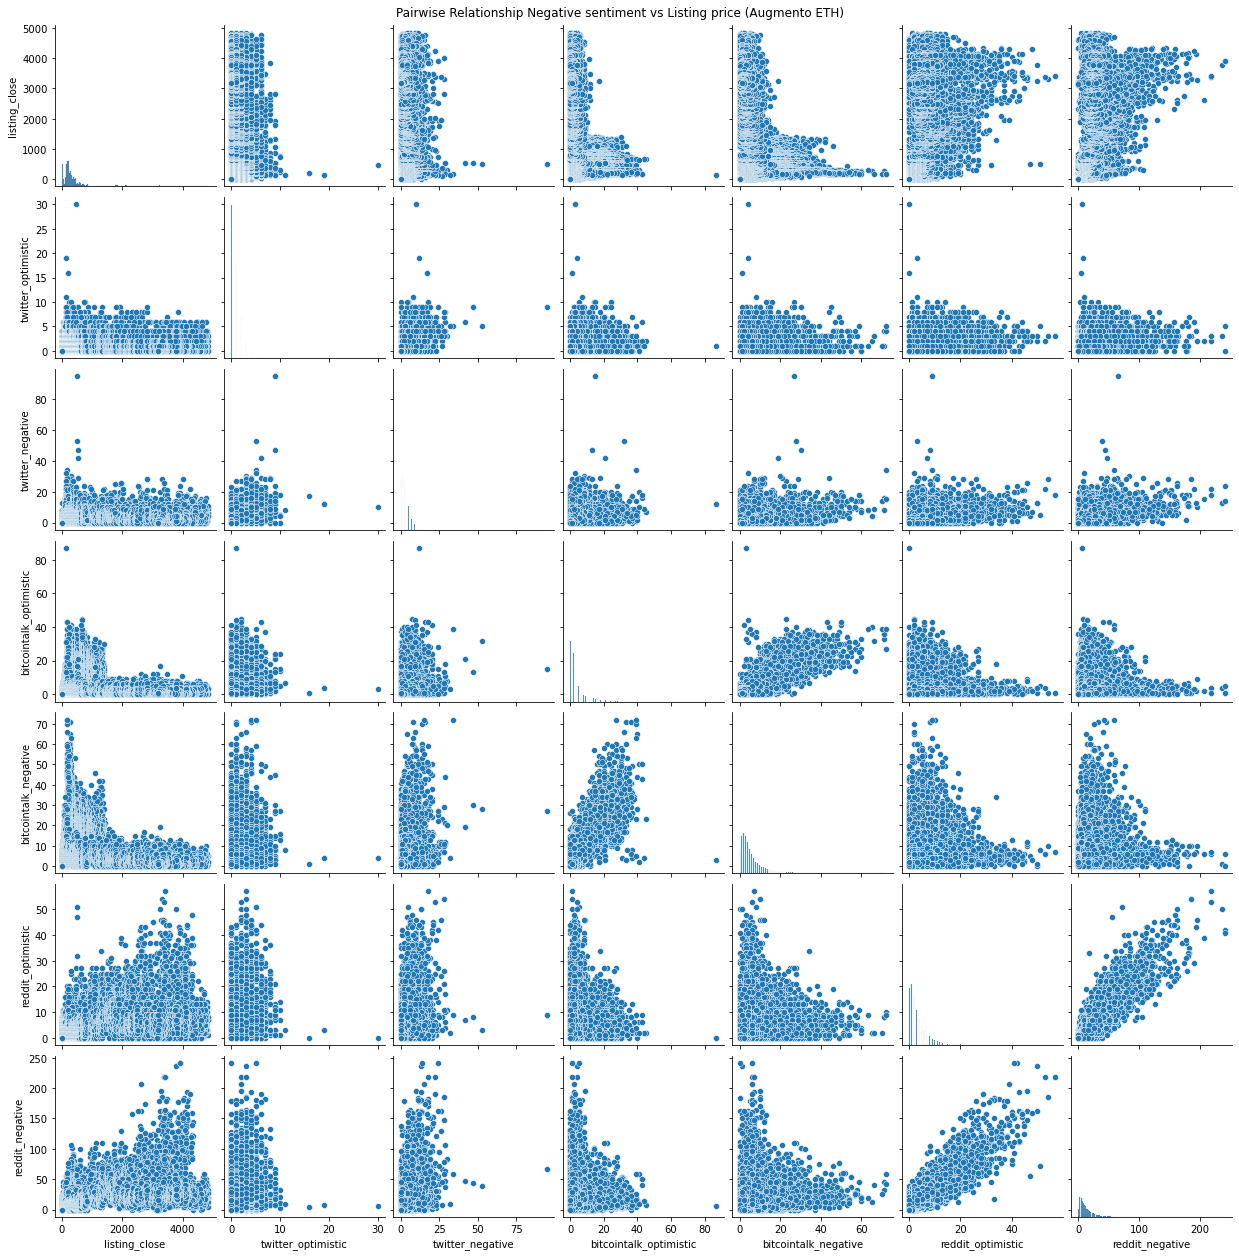

In [25]:
s=sns.pairplot(eth_aug)
s.fig.suptitle('Pairwise Relationship Negative sentiment vs Listing price (Augmento ETH)',y=1)
plt.savefig('Project/pairwise_plot_eth.jpg',bbox_inches='tight',dpi=300)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

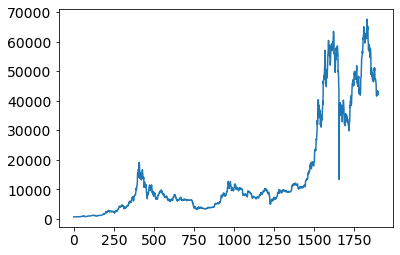

In [23]:
plt.plot(btc_aug1['listing_close']['mean'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

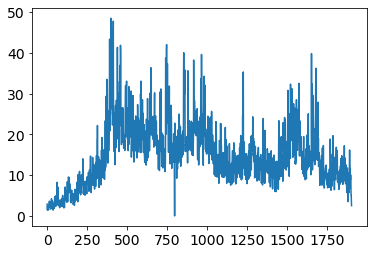

In [24]:
plt.plot(btc_aug1['twitter_negative']['mean'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

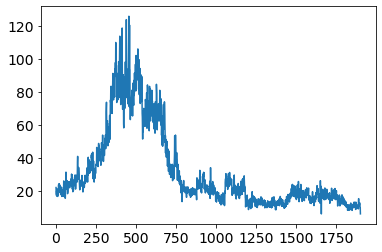

In [25]:
plt.plot(btc_aug1['bitcointalk_negative']['mean'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

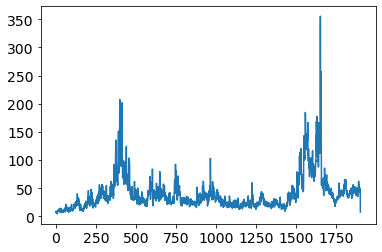

In [26]:
plt.plot(btc_aug1['reddit_negative']['mean'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

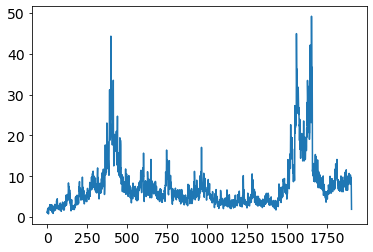

In [27]:
plt.plot(btc_aug1['reddit_optimistic']['mean'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

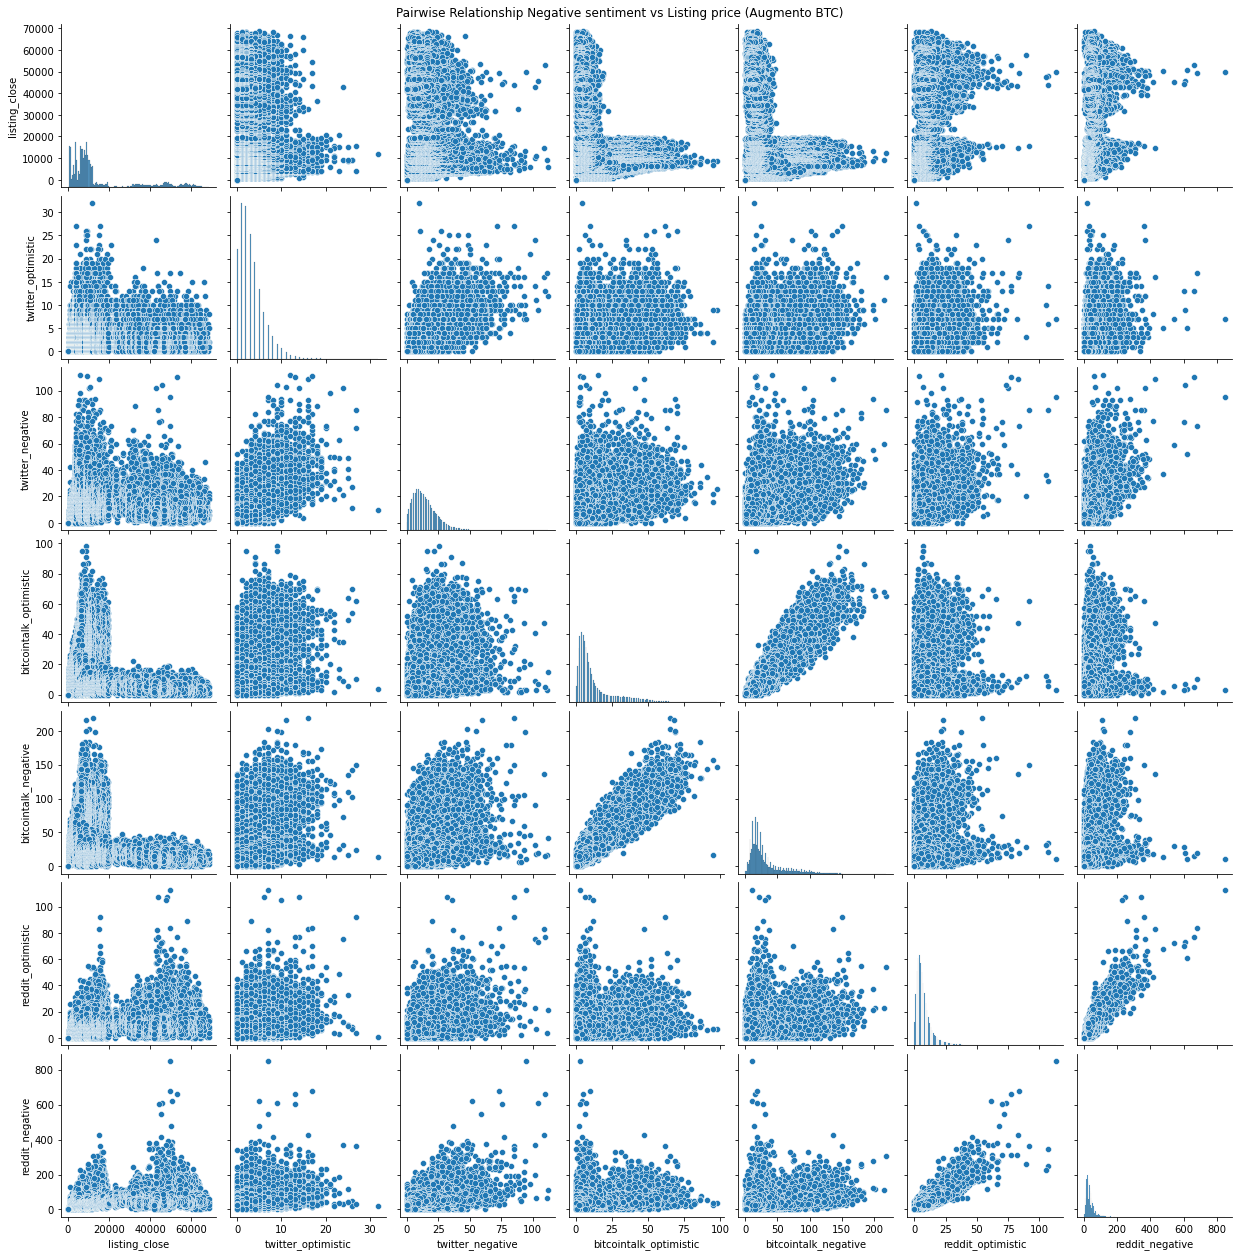

In [77]:
s=sns.pairplot(btc_aug)
s.fig.suptitle('Pairwise Relationship Negative sentiment vs Listing price (Augmento BTC)',y=1)
plt.savefig('Project/pairwise_plot.jpg',bbox_inches='tight',dpi=300)

In [61]:
btc_aug1

Date      Time
0      2016-11-04  15:00:00
1      2016-11-04  16:00:00
2      2016-11-04  17:00:00
3      2016-11-04  18:00:00
4      2016-11-04  19:00:00
...           ...       ...
45616  2022-01-18  07:00:00
45617  2022-01-18  08:00:00
45618  2022-01-18  09:00:00
45619  2022-01-18  10:00:00
45620  2022-01-18  11:00:00

[45621 rows x 2 columns]

In [43]:
#btc_aug1.pop('listing_close')

<AxesSubplot:xlabel='None-None'>

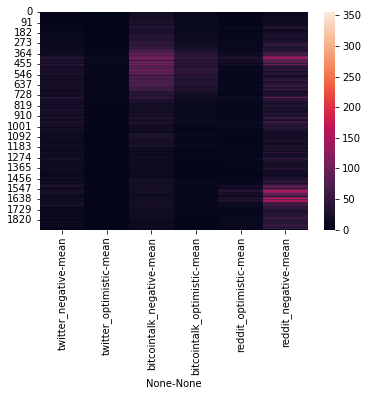

In [44]:
sns.heatmap(btc_aug1)

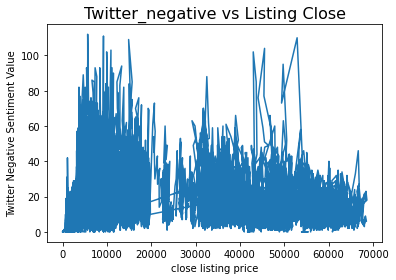

In [41]:
plt.plot(btc_aug['listing_close'],btc_aug['twitter_negative'])
plt.title('Twitter_negative vs Listing Close',fontsize=16)
plt.xlabel('close listing price')
plt.ylabel('Twitter Negative Sentiment Value')
plt.savefig('Project/aug_btc_listingprice_vs_twitter_negative.jpg',bbox_inches='tight',dpi=300)

In [71]:
btc_aug2=btc_aug1.sample(500).reset_index()

In [72]:
btc_aug2

index        Date listing_close twitter_negative twitter_optimistic  \
                               mean             mean               mean   
0     412  2017-12-21  16222.230000        35.916667           7.500000   
1    1405  2020-09-09  10189.608750        10.541667           2.125000   
2      11  2016-11-15    711.396667         2.416667           1.416667   
3     278  2017-08-09   3339.596667         7.458333           2.583333   
4     804  2019-01-17   3602.475833        14.875000           3.625000   
..    ...         ...           ...              ...                ...   
495  1290  2020-05-17   9631.119583        13.875000           2.375000   
496    91  2017-02-03   1012.203750         3.333333           2.250000   
497  1661  2021-05-23  34958.115000        24.541667           3.500000   
498   993  2019-07-25  10028.022083        15.750000           5.000000   
499  1053  2019-09-23   9873.319167        16.125000           4.208333   

    bitcointalk_negative bitcointalk_optimistic reddit_optimistic  \
                    mean                   mean              mean   
0             103.541667              40.458333         27.833333   
1              12.166667               3.916667          3.166667   
2              17.666667               7.166667          1.833333   
3              37.458333              15.541667          6.750000   
4              21.000000               8.916667          4.625000   
..                   ...                    ...               ...   
495            11.000000               3.833333          5.083333   
496            24.916667               7.666667          2.541667   
497            16.833333               3.583333         10.333333   
498            18.125000               7.500000          6.666667   
499            12.000000               5.416667          3.958333   

    reddit_negative  
               mean  
0        159.458333  
1         20.083333  
2          9.333333  
3         34.708333  
4         25.500000  
..              ...  
495       31.916667  
496       14.041667  
497       61.583333  
498       35.708333  
499       23.125000  

[500 rows x 9 columns]

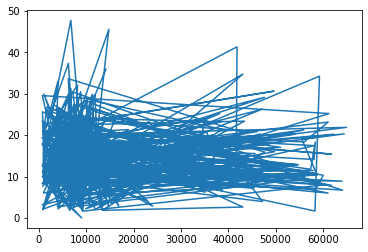

In [80]:
plt.plot(btc_aug2.sample(500)['listing_close','mean'],btc_aug2['twitter_negative','mean'])


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

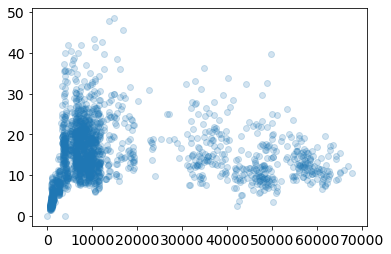

In [107]:
plt.scatter(btc_aug1['listing_close']['mean'],btc_aug1['twitter_negative']['mean'], alpha=0.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [12]:
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import datasets, model_selection
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pickle as pkl

In [42]:
def linear_Regression(X_train,X_test,y_train,y_test):
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Linear Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Linear Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Linear Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Linear Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')

def lasso_Regression(X_train,X_test,y_train,y_test):
    lr=Lasso(0.01)
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Lasso Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Lasso Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
    
    
def ridge_Regression(X_train,X_test,y_train,y_test):
    lr=Ridge()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Ridge Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Ridge Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Ridge Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Ridge Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    print(np.mean(scores.mean()))
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
    
def elastic_Regression(X_train,X_test,y_train,y_test):
    lr=ElasticNet()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Elastic Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Elastic Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Elastic Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Elastic Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    
def poly_regression(X_train,X_test,y_train,y_test):
    poly = PolynomialFeatures()

    lm_poly = LinearRegression()
    lm_poly.fit(poly.fit_transform(X_train), y_train)
    y_pred = lm_poly.predict(poly.transform(X_train))
    print(f'Polynomial Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Polynomial Regression MSE: {mean_squared_error(y_train,y_pred)}')
    y_pred = lm_poly.predict(poly.transform(X_test))
    print(f'Polynomial Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Polynomial Regression MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    print("Polynomial Regression:", r2_score(y_test, y_pred))
    scores = cross_val_score(lm_poly, X_test, y_test, cv=kfold)
    print(scores.mean())
    
def des_num(df,col_name):
    print(f"\nColumn: {col_name}")
    print(f"\nMinimum: {df[col_name].min()}")
    print(f"\nMaximum: {df[col_name].max()}")
    print(f"\nAverage: {df[col_name].mean()}")
    print(f"\nStandard Deviation: {df[col_name].std()}")
    print(f"\nMedian: {df[col_name].median()}")
    
def randomForest_regression(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=2000, max_features=10, max_depth=4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    print('Train Random Forests R2: {}'.format(r2_score(y_train, y_pred)))
    y_pred = rf.predict(X_test)
    print('Test Random Forests R2: {}'.format(r2_score(y_test, y_pred)))
    rf_mse=mean_squared_error(y_test,rf.predict(X_test))
    print('Root mean squared Random Forest:{}'.format(rf_mse))
    scores = cross_val_score(rf_mse, X_test, y_test, cv=kfold)
    print(scores)
    
def int_encoding(df,variable, ordinal_mapping):
    df[variable]=df[variable].map(ordinal_mapping)

In [37]:
X_train, X_test, y_train, y_test=train_test_split(btc_aug[list_features],btc_aug['listing_close'],test_size=0.33,random_state=42)

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [101]:
#fit a simple linear regression
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
print(f"""
train score: {lr.score(X_train, y_train):%}
test score: {lr.score(X_test, y_test):%}
""")


train score: 45.523878%
test score: 44.413156%



In [103]:
lr.feature_names=list_features

In [104]:
lr.target_names=['listing_close']

In [105]:
with open("./Project/crypto_app/models/lr.pkl", "wb") as f:
    pkl.dump(lr, f)

In [23]:
list_features=[]

In [24]:
for btc in btc_aug.columns:
    if btc !='Date':
        if btc != 'listing_close':
            list_features.append(btc)

Linear Regression R2 train: 0.6419186244895757
Linear Regression MSE: 100548795.00038819
Linear Regression R2 test: 0.6101329512177643
Linear Regression MSE: 120925019.06479543
Mean absolute error: 7463.618134340333
0.5905028669544384


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


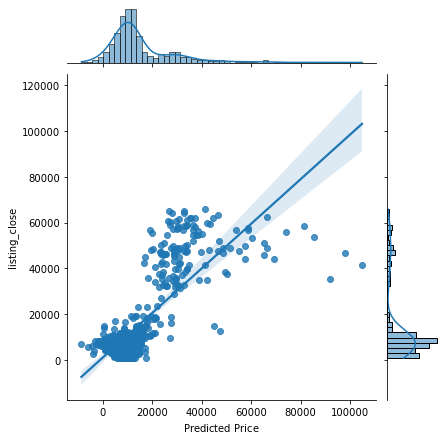

In [43]:
linear_Regression(X_train,X_test,y_train,y_test)

In [25]:
list_features

['twitter_negative',
 'twitter_optimistic',
 'bitcointalk_negative',
 'bitcointalk_optimistic',
 'reddit_optimistic',
 'reddit_negative',
 'bitcointalk_positive',
 'reddit_positive',
 'twitter_positive',
 'twitter_prediction',
 'bitcointalk_prediction',
 'reddit_prediction']

In [126]:
lr.score(X_test,y_test)

0.787103718769266

In [127]:
scores = cross_val_score(lr, X_test, y_test, cv=kfold)
print(scores.mean())

0.7837398621503315


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.392e+10, tolerance: 3.577e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+10, tolerance: 1.494e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Lasso Regression R2 train: 0.6419186244814195
Lasso Regression MSE: 100548795.00267844
Lasso Regression R2 test: 0.6101331328229658
Lasso Regression MSE: 120924962.73633033
Mean absolute error: 7463.61555578626
0.590502717666993


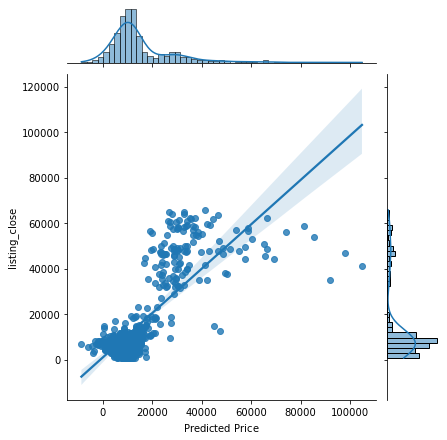

In [40]:
lasso_Regression(X_train,X_test,y_train,y_test)

Ridge Regression R2 train: 0.641918612218781
Ridge Regression MSE: 100548798.44601172
Ridge Regression R2 test: 0.6101260158595
Ridge Regression MSE: 120927170.20409524
Mean absolute error: 7463.731566986182
0.5905780210637774
0.5905780210637774


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


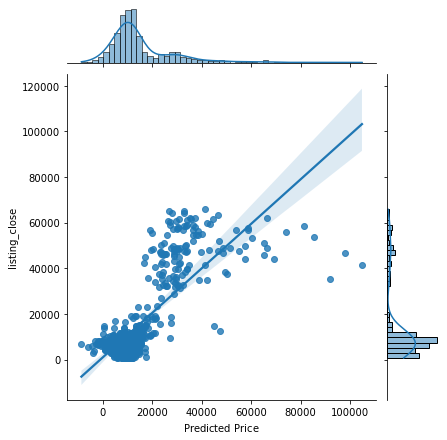

In [41]:
ridge_Regression(X_train,X_test,y_train,y_test)

In [132]:
idx=np.argsort(lr.coef_)

In [133]:
y_data=np.array(X_train.columns)
x_data=lr.coef_

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


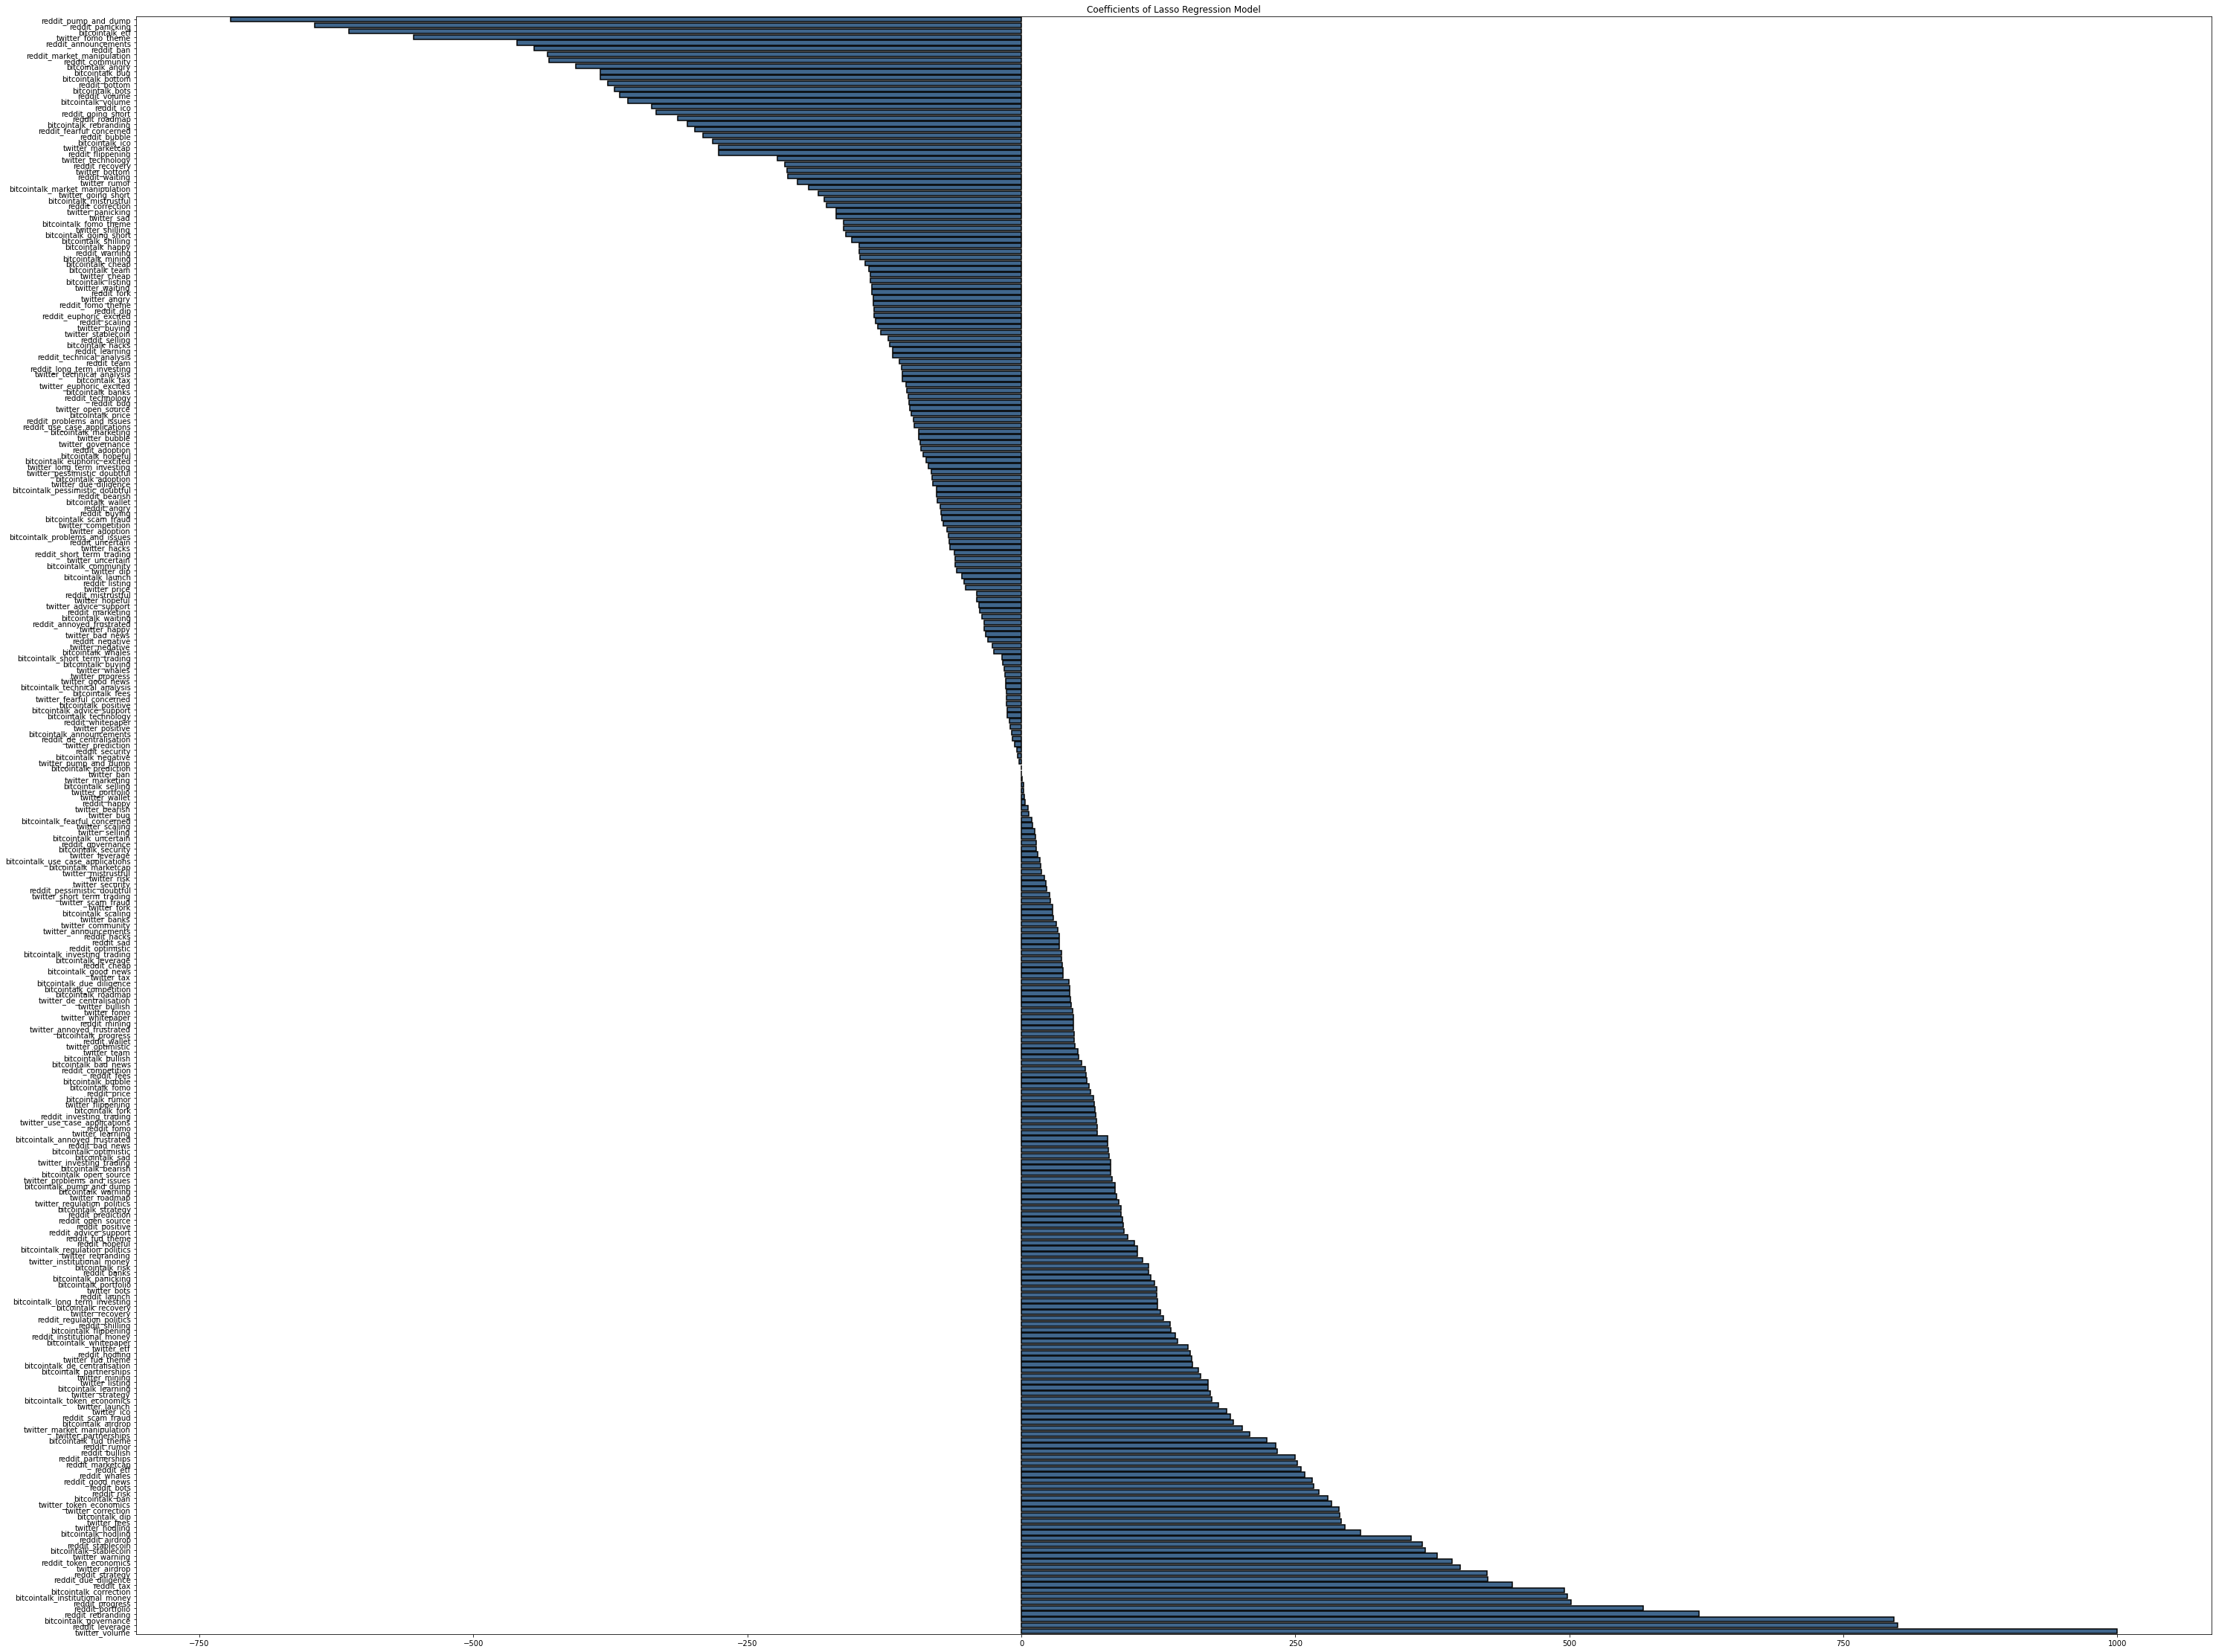

In [140]:
plt.subplots(figsize=(50,40))
ax=sns.barplot(x_data[idx],y_data[idx],
              color=(0.2,0.4,0.6),
              edgecolor=(0,0,0),
              linewidth=1.5)
ax.set_title('Coefficients of Lasso Regression Model')
plt.savefig("coefficient_meaningful.jpg",bbox_inches='tight',dpi=300)

Lasso Model:


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.871e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.248e+10, tolerance: 2.849e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e+10, tolerance: 2.858e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.309e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.345e+09, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+08, tolerance: 2.849e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

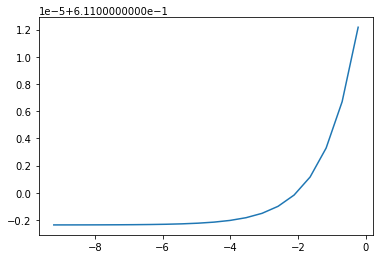

In [44]:
#function from lasso regression in Module2
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [45]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [46]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

In [49]:
#function from lasso regression in Module2
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Lasso Grid Search


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.871e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.248e+10, tolerance: 2.849e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.765e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e+10, tolerance: 2.849e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.598e+10, tolerance: 2.858e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.713e+10, tolerance: 2.978e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.460e+10, tolerance: 2.858e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.408e+10, tolerance: 2.978e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.921e+09, tolerance: 2.858e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

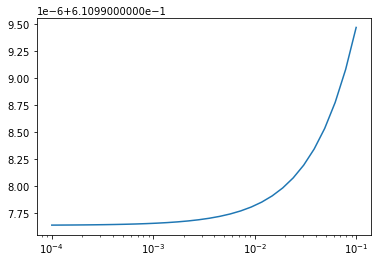

In [50]:
#from lasso regression in Module2
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

In [51]:
#from lasso regression in Module2
y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.6101318218436999
